# Data Preparation

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud

In [183]:
df = pd.read_csv("Online Retail.csv")

In [184]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom

In [185]:
len(df)

541909

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


# Check data Duplication

In [187]:
# Check if any duplicated value in all rows
df.duplicated().sum()

5268

In [188]:
# Drop duplicate value
df = df.drop_duplicates()
# Check is there any duplicate value
df.duplicated().sum()

0

# Check missing Value

In [189]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    

output.sort_values("missing",ascending=False).reset_index(drop=True)
output

variable    dtype   count  unique  missing
0    InvoiceNo   object  536641   25900        0
1    StockCode   object  536641    4070        0
2  Description   object  536641    4224     1454
3     Quantity    int64  536641     722        0
4  InvoiceDate   object  536641   23260        0
5    UnitPrice  float64  536641    1630        0
6   CustomerID    int64  536641    4372        0
7      Country   object  536641      38        0

# Data Preprocessing

## Fill missing value by reference StockCode

In [190]:
# Store the stock code from missing value
list_stockcode_from_missing = []
for item in df[df['Description'].isnull()]['StockCode']:
    list_stockcode_from_missing.append(item)

In [191]:
# find most suitable description based on stock code
def isNaN(string):
    return string != string
list_description_for_missing = []

for idx,code in enumerate(df['StockCode']):
    for stock in list_stockcode_from_missing:
        if(code == stock):
            if(isNaN(df['Description'].iloc[idx])):
                continue
            list_description_for_missing.append(df['Description'].iloc[idx])
            break
    if(len(list_description_for_missing) == len(list_stockcode_from_missing)):
        break
        
len(list_description_for_missing)

1454

In [192]:
idx_list = df[df['Description'].isnull()].index

desc_data = pd.Series(list_description_for_missing,index = idx_list)

In [193]:
# Fill missing value from description list that we get from stockcode 

df['Description'].fillna(desc_data,inplace=True)
# check it again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

##  stock code with letter

In [194]:
filtered_df = df[df['StockCode'].str.contains('^[A-Z]$')]
filtered_stockcodes = filtered_df['StockCode'].unique()
filtered_df = df[df['StockCode'].isin(filtered_stockcodes)]
filtered_df = filtered_df.drop_duplicates(subset=['StockCode'])
filtered_df

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
141      C536379         D         Discount        -1  2010-12-01 09:41:00   
2239      536569         M           Manual         1  2010-12-01 15:35:00   
14436    C537581         S          SAMPLES        -1  2010-12-07 12:03:00   
299982   A563185         B  Adjust bad debt         1  2011-08-12 14:50:00   

        UnitPrice  CustomerID         Country  
141         27.50       14527  United Kingdom  
2239         1.25       16274  United Kingdom  
14436       12.95       15287  United Kingdom  
299982   11062.06       15287  United Kingdom

In [195]:
# I think the code just some code not a sales code then we need to remove it
df = df[~df['StockCode'].isin(filtered_stockcodes)]
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  
0       2010-12-01 08:26:00       2.55       17850  United Kingdom  
1       2010-12-01 08:26:00       3.39       17850  United Kingdom  
2       2010-12-01 08:26:00       2.75       17850  United Kingdom  
3       2010-12-01 08:26:00       3.39       17850  United Kingdom  
4       2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                     ...        ...         ...             ...  
541904  2011-12-09 12:50:00       0.85       12680          France  
541905  2011-12-09 12:50:00       2.10       12680          France  
541906  2011-12-09 12:50:00       4.15       12680          France  
541907  2011-12-09 12:50:00       4.15       12680          France  
541908  2011-12-09 12:50:00       4.95       12680          France  

[535933 rows x 8 columns]

## Quantity or UnitPrice of stuff < 0

In [196]:
# Quantity 0 show all unit Price nan, i think the data has error input. 
df.loc[df['Quantity'] < 0]

InvoiceNo StockCode                        Description  Quantity  \
154      C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238      C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
...          ...       ...                                ...       ...   
540448   C581490     22178    VICTORIAN GLASS HANGING T-LIGHT       -12   
540449   C581490     23144    ZINC T-LIGHT HOLDER STARS SMALL       -11   
541715   C581568     21258         VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978   HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979      36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
154     2010-12-01 09:49:00       4.65       15311  United Kingdom  
235     2010-12-01 10:24:00       1.65       17548  United Kingdom  
236     2010-12-01 10:24:00       0.29       17548  United Kingdom  
237     2010-12-01 10:24:00       0.29       17548  United Kingdom  
238     2010-12-01 10:24:00       0.29       17548  United Kingdom  
...                     ...        ...         ...             ...  
540448  2011-12-09 09:57:00       1.95       14397  United Kingdom  
540449  2011-12-09 09:57:00       0.83       14397  United Kingdom  
541715  2011-12-09 11:57:00      10.95       15311  United Kingdom  
541716  2011-12-09 11:58:00       1.25       17315  United Kingdom  
541717  2011-12-09 11:58:00       1.25       17315  United Kingdom  

[10206 rows x 8 columns]

In [197]:
df.loc[df['Quantity'] < 0, 'Quantity'] = df['Quantity'].abs()

In [198]:
# There is no minus value in unit Price
df.loc[df['UnitPrice'] < 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

## Quantity or UnitPrice of stuff = 0

In [199]:
df.loc[df['Quantity'] == 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [200]:
df.loc[df['UnitPrice'] == 0]

InvoiceNo StockCode                          Description  Quantity  \
622       536414     22139       CREAM CUPID HEARTS COAT HANGER        56   
1970      536545     21134  KNITTED UNION FLAG HOT WATER BOTTLE         1   
1971      536546     22145       RED WOOLLY HOTTIE WHITE HEART.         1   
1972      536547     37509               HAND WARMER UNION JACK         1   
1987      536549    85226A            HAND WARMER RED POLKA DOT         1   
...          ...       ...                                  ...       ...   
536981    581234     72817           ENVELOPE 50 BLOSSOM IMAGES        27   
538504    581406    46000M         POLYESTER FILLER PAD 45x45cm       240   
538505    581406    46000S         POLYESTER FILLER PAD 40x40cm       300   
538554    581408     85175                 JUMBO BAG STRAWBERRY        20   
538919    581422     23169                              smashed       235   

                InvoiceDate  UnitPrice  CustomerID         Country  
622     2010-12-01 11:52:00        0.0       15287  United Kingdom  
1970    2010-12-01 14:32:00        0.0       15287  United Kingdom  
1971    2010-12-01 14:33:00        0.0       15287  United Kingdom  
1972    2010-12-01 14:33:00        0.0       15287  United Kingdom  
1987    2010-12-01 14:34:00        0.0       15287  United Kingdom  
...                     ...        ...         ...             ...  
536981  2011-12-08 10:33:00        0.0       15287  United Kingdom  
538504  2011-12-08 13:58:00        0.0       15287  United Kingdom  
538505  2011-12-08 13:58:00        0.0       15287  United Kingdom  
538554  2011-12-08 14:06:00        0.0       15287  United Kingdom  
538919  2011-12-08 15:24:00        0.0       15287  United Kingdom  

[2504 rows x 8 columns]

In [201]:
# I think the unit price 0 will be same with no sales then we cannot count the sales it will be removed
df = df.loc[df['UnitPrice'] != 0]

## InvoiceDate to datetime

In [202]:
# Invoice date datetime
# Change invoicedate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst = True)
df['InvoiceDate']

C:\Users\user\AppData\Local\Temp\ipykernel_18400\3816374746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst = True)


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 533429, dtype: datetime64[ns]

In [203]:
# Let's create column for each month,year, and day of week
df['year']= df['InvoiceDate'].dt.year

df['month']= df['InvoiceDate'].dt.month

df['day']= df['InvoiceDate'].dt.day

df['weekday']= df['InvoiceDate'].dt.weekday

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

df['dayofweek']= df['InvoiceDate'].dt.weekday.map(dw_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_18400\2009336480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']= df['InvoiceDate'].dt.year
C:\Users\user\AppData\Local\Temp\ipykernel_18400\2009336480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']= df['InvoiceDate'].dt.month
C:\Users\user\AppData\Local\Temp\ipykernel_18400\2009336480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [232]:
# Create new column with time interval labels
df['Time'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df['Time of Day'] = ['Early Morning' if x < 6 
                     else ('Morning' if x < 12 
                           else ('Noon' if x < 14 
                                 else ('Afternoon' if x < 18 
                                       else ('Evening' if x < 22 else 'Night')))) for x in df['Time']]

C:\Users\user\AppData\Local\Temp\ipykernel_18400\110255243.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_18400\110255243.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Change customerId to int

In [204]:
# customerid to int
df['CustomerID'] = df['CustomerID'].astype(str)

C:\Users\user\AppData\Local\Temp\ipykernel_18400\2026469687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(str)


## Sales

In [205]:
# Sales = qty * price
df['Sales'] = df['Quantity'] * df['UnitPrice']
df['Sales'].head()

C:\Users\user\AppData\Local\Temp\ipykernel_18400\2569449882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Sales, dtype: float64

# describe Value

In [206]:
df.describe().T

count         mean         std       min      25%      50%  \
Quantity   533429.0    10.939925  216.506796     1.000     1.00     3.00   
UnitPrice  533429.0     4.262886   72.843081     0.001     1.25     2.10   
year       533429.0  2010.921900    0.268330  2010.000  2011.00  2011.00   
month      533429.0     7.548215    3.508591     1.000     5.00     8.00   
day        533429.0    15.019661    8.660336     1.000     7.00    15.00   
weekday    533429.0     2.425955    1.841709     0.000     1.00     2.00   
Sales      533429.0    21.168013  375.957670     0.001     3.90     9.92   

               75%        max  
Quantity     11.00   80995.00  
UnitPrice     4.13   17836.46  
year       2011.00    2011.00  
month        11.00      12.00  
day          22.00      31.00  
weekday       4.00       6.00  
Sales        17.70  168469.60

In [251]:
df.describe(include='object')

InvoiceNo StockCode                         Description CustomerID  \
count     533429    533429                              533429     533429   
unique     23453      3934                                4039       4362   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER      15287   
freq        1114      2295                                2353     132417   

               Country dayofweek Time of Day          Month  
count           533429    533429      533429         533429  
unique              38         6           4             13  
top     United Kingdom  Thursday   Afternoon  November 2011  
freq            487199    102428      224359          83006

# EDA

## Melakukan analisa untuk menentukan perilaku dan preferensi pelanggan

### Distribusi transaksi di tiap negara

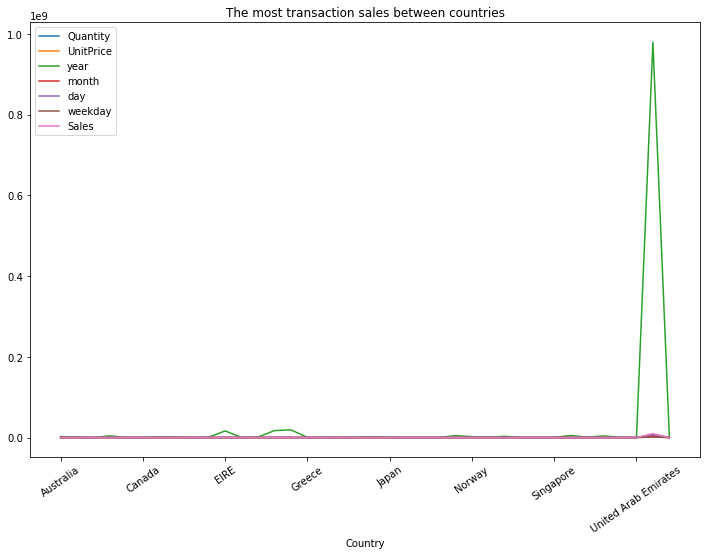

In [207]:
df_country = df.groupby(by=['Country']).sum()
df_country.plot(kind='line', figsize=(12,8))
plt.title("The most transaction sales between countries")
plt.xticks(rotation=35)
plt.show()

In [224]:
# Group the data by 'Country' and calculate the total transaction count
transactions_per_month = df.groupby(['Country', df['InvoiceDate'].dt.strftime('%m-%Y')]).size().reset_index(name='Transaction Count')
total_transactions_by_country = transactions_per_month.groupby('Country')['Transaction Count'].sum().reset_index()

# Sort the total transaction counts in descending order
total_transactions_by_country = total_transactions_by_country.sort_values('Transaction Count', ascending=False)

# Create a treemap using Plotly Express
fig = px.treemap(total_transactions_by_country, 
                 path=['Country'], 
                 values='Transaction Count', 
                 color='Country',  # Use 'Country' as the color variable
                 color_discrete_sequence=px.colors.qualitative.Prism,  # Specify the discrete color sequence
                 title='Distribution of Transactions by Country (Treemap)',
                 )

# Show the plot
fig.show()

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



United Arab Emirates is the country that have the most sales

### sales for all transaction(each invoice)

In [225]:
df_invoice = df.groupby(by=['InvoiceNo']).sum()[['Sales','Quantity']]
px.box(df_invoice)

In [227]:
df_invoice.describe().T

count        mean          std   min    25%     50%    75%  \
Sales     23453.0  481.457885  2072.683088  0.38  97.73  249.64  443.0   
Quantity  23453.0  248.824159  1142.418472  1.00  35.00  121.00  261.0   

               max  
Sales     168469.6  
Quantity   80995.0

### Sales by time

#### Year

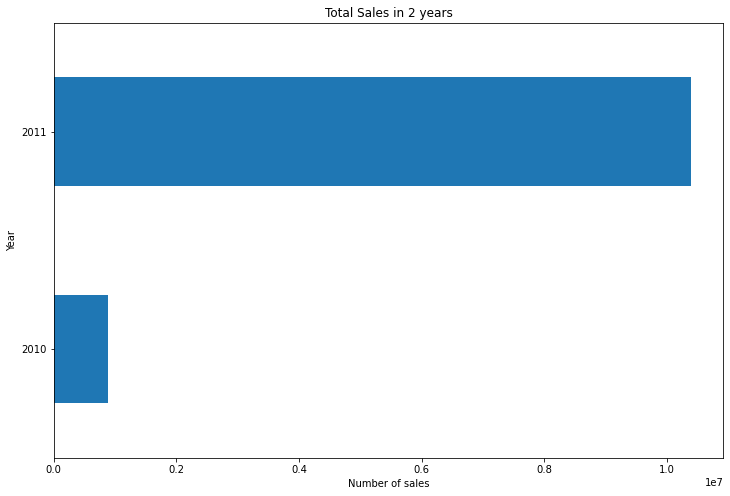

In [229]:
df_year = df.groupby(by=['year']).sum()['Sales'].plot(kind='barh',figsize=(12,8))
plt.title('Total Sales in 2 years')
plt.xlabel('Number of sales')
plt.ylabel('Year')
plt.show()

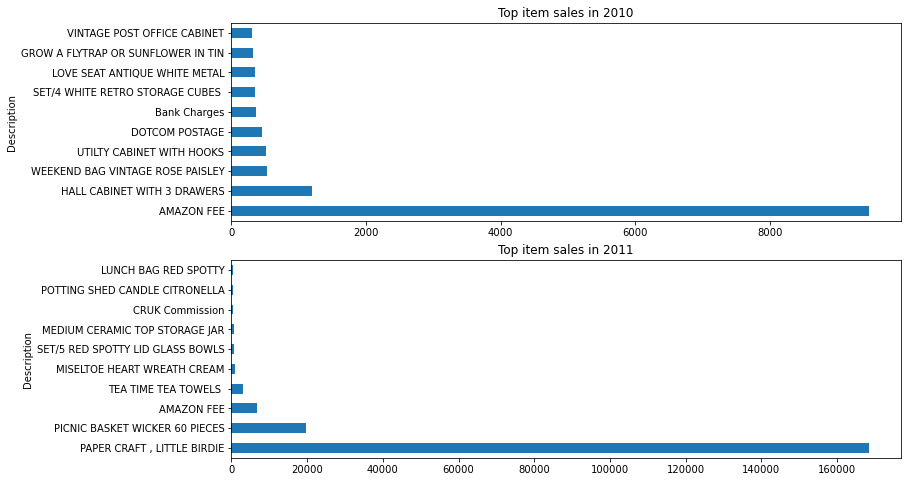

In [231]:
plt.subplot(2,1,1)
# creating the bar plot
df_sales_item_2010 = df.groupby(['Description','year']).mean()
df_sales_item_2010 = df_sales_item_2010.unstack('year')['Sales']
df_sales_item_2010 = df_sales_item_2010.sort_values(2010,ascending=False)[2010].head(10).plot(kind='barh',figsize=(12,8))
plt.title("Top item sales in 2010")
plt.subplot(2,1,2)
df_sales_item_2011 = df.groupby(['Description','year']).mean()
df_sales_item_2011 = df_sales_item_2011.unstack('year')['Sales']
df_sales_item_2011 = df_sales_item_2011.sort_values(2011,ascending=False)[2011].head(10).plot(kind='barh',figsize=(12,8))

plt.title("Top item sales in 2011")
plt.show()

#### Month

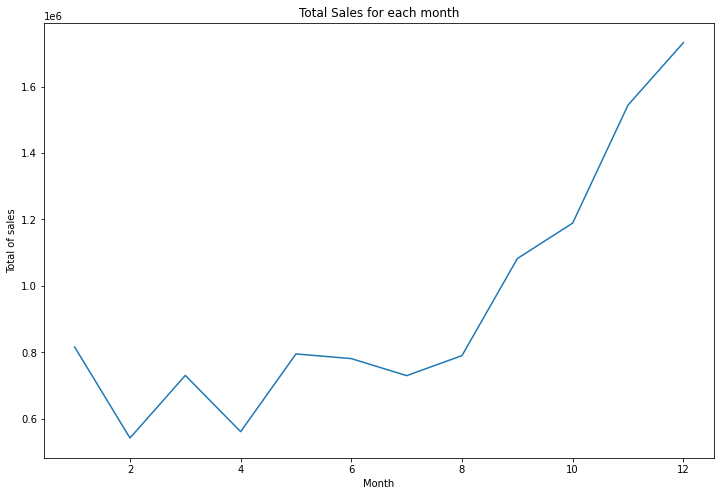

In [230]:
df_month = df.groupby(by=['month']).sum()['Sales'].plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each month')
plt.ylabel('Total of sales')
plt.xlabel('Month')
plt.show()

#### Day of Week

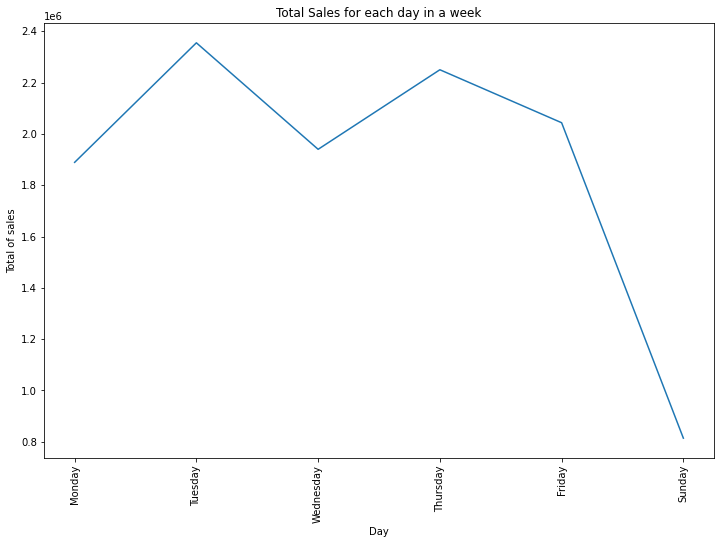

In [215]:
df_dayofweek = df.groupby(by=['dayofweek']).sum().sort_values('weekday',ascending=True)['Sales']\
.plot(kind='line',figsize=(12,8))
plt.title('Total Sales for each day in a week')
plt.ylabel('Total of sales')
plt.xlabel('Day')
plt.xticks(rotation=90)
plt.show()

#### Time_of_day

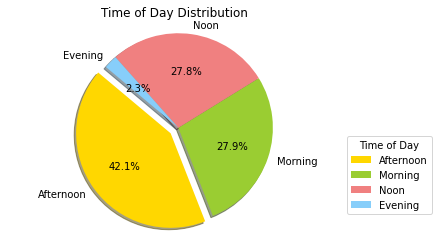

In [234]:
counts = df['Time of Day'].value_counts()

# Data
labels = counts.index.tolist()
sizes = counts.tolist()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Time of Day Distribution')

plt.axis('equal')
plt.legend(title='Time of Day', loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

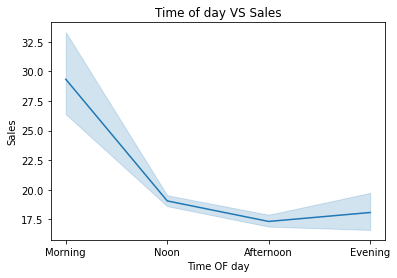

In [238]:
sns.lineplot(data= df,x="Time of Day", y ='Sales')
plt.xlabel("Time OF day")
plt.ylabel("Sales")
plt.title("Time of day VS Sales")

plt.show()

### Product Analysis

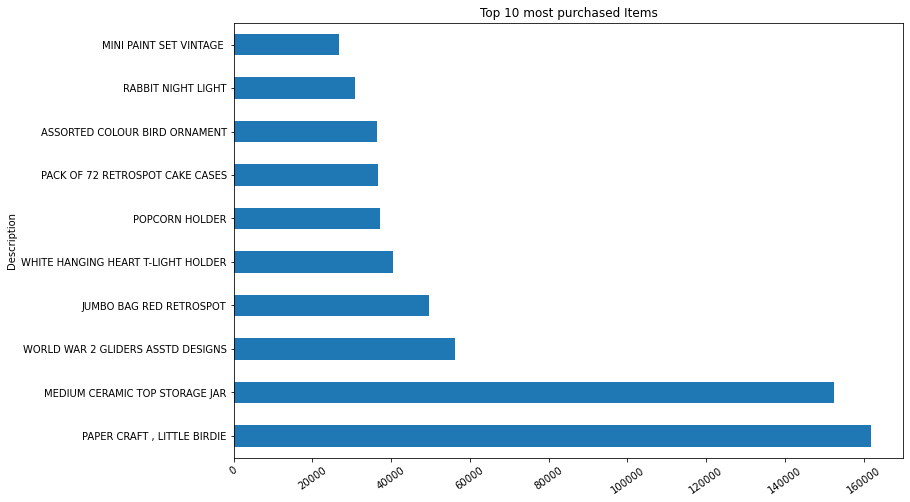

In [244]:
df_purchased_item = df.groupby('Description').sum()
df_purchased_item = df_purchased_item.sort_values('Quantity',ascending=False).head(10)
df_purchased_item['Quantity'].plot(kind = 'barh',figsize=(12,8))
plt.xticks(rotation=35)
plt.title("Top 10 most purchased Items")
plt.show()

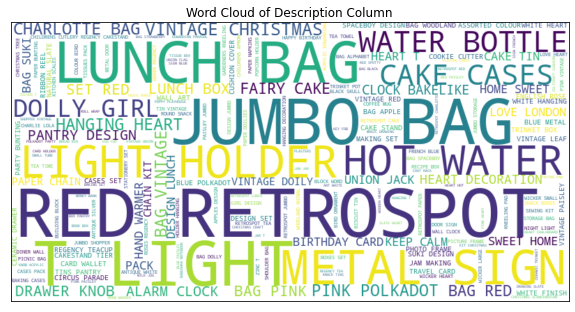

In [247]:
text = ' '.join(df['Description'].dropna().astype(str).values)

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(text)

# Create a matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Display the word cloud on the axis
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Word Cloud of Description Column')

# Remove axis ticks
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_18400\1743039491.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_18400\1743039491.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



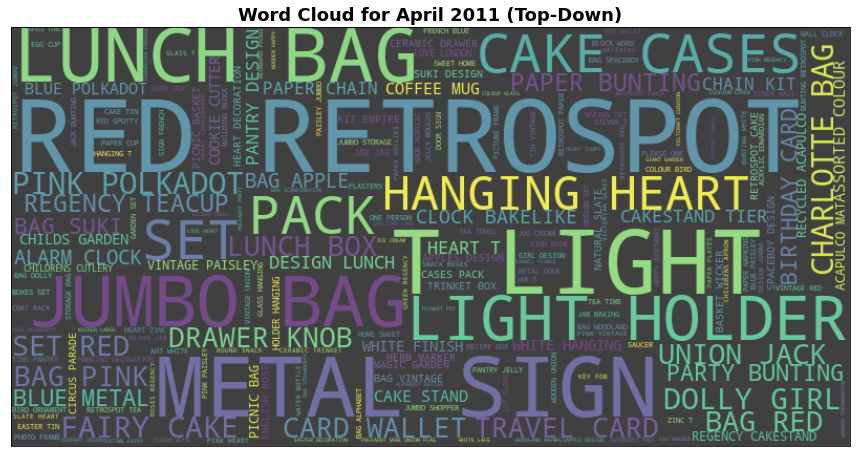

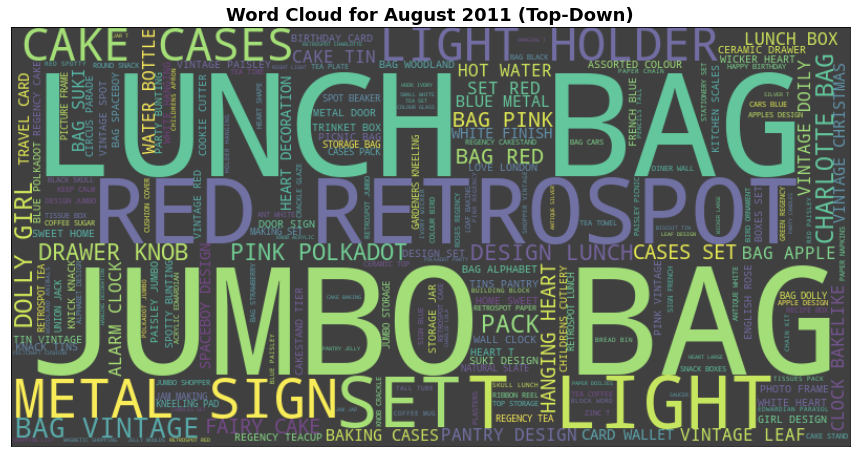

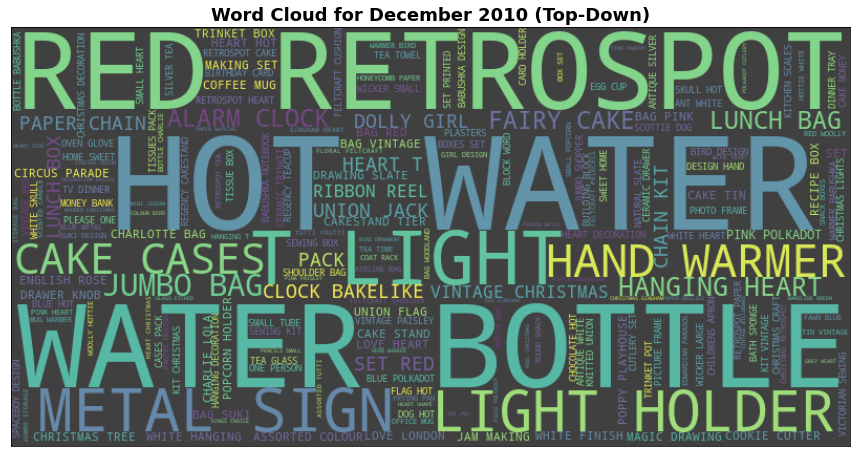

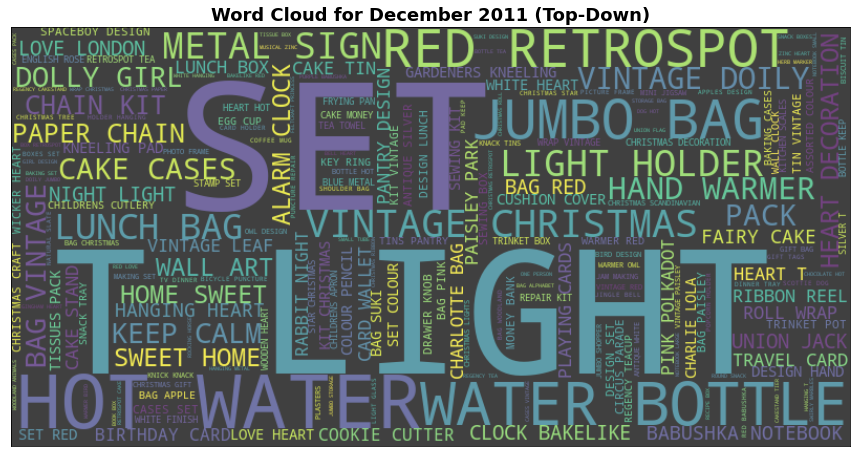

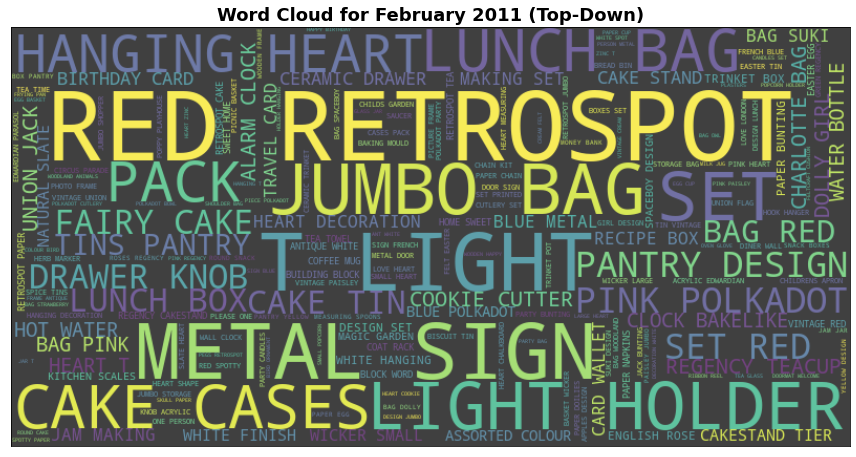

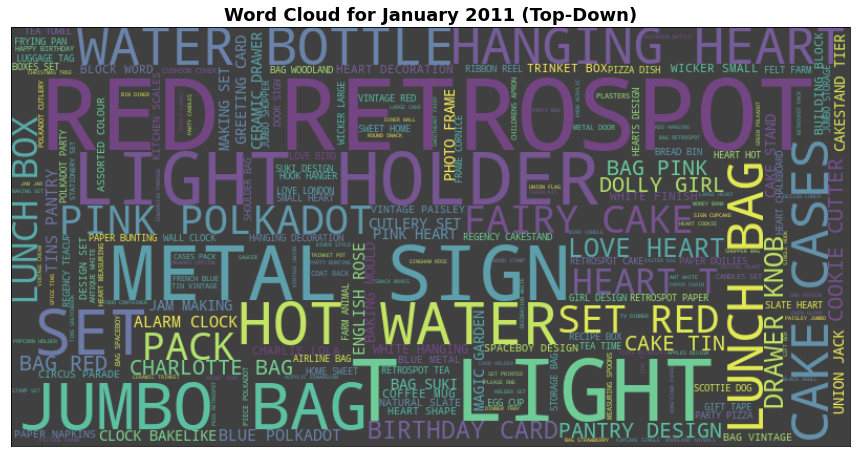

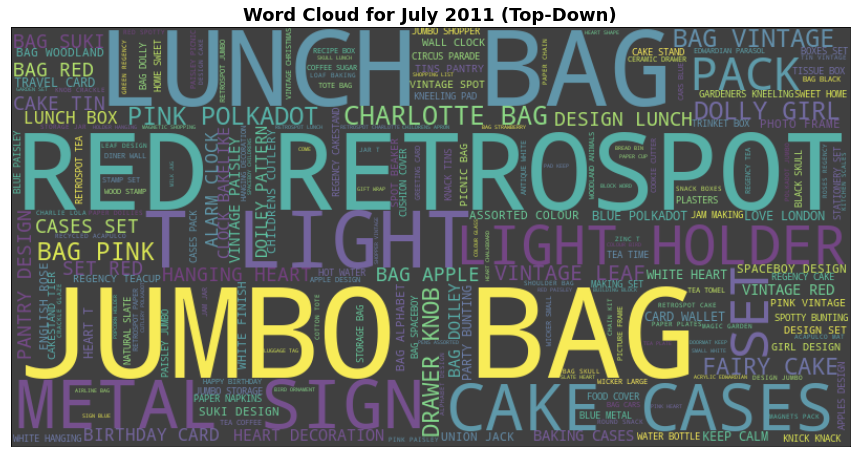

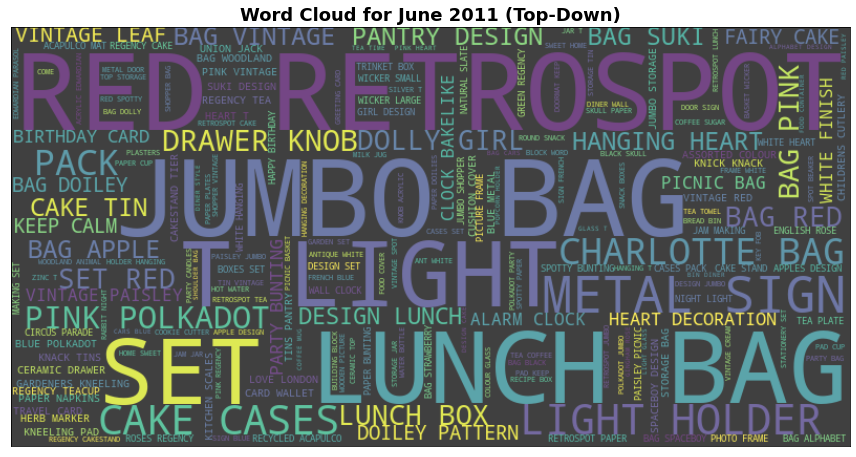

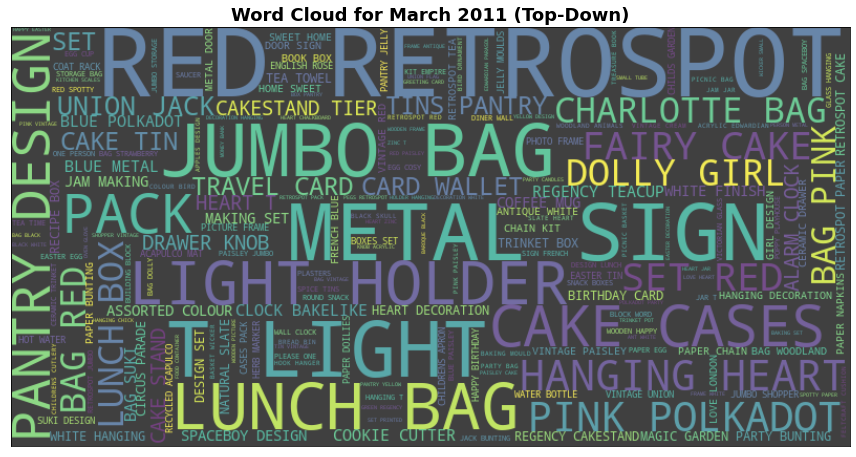

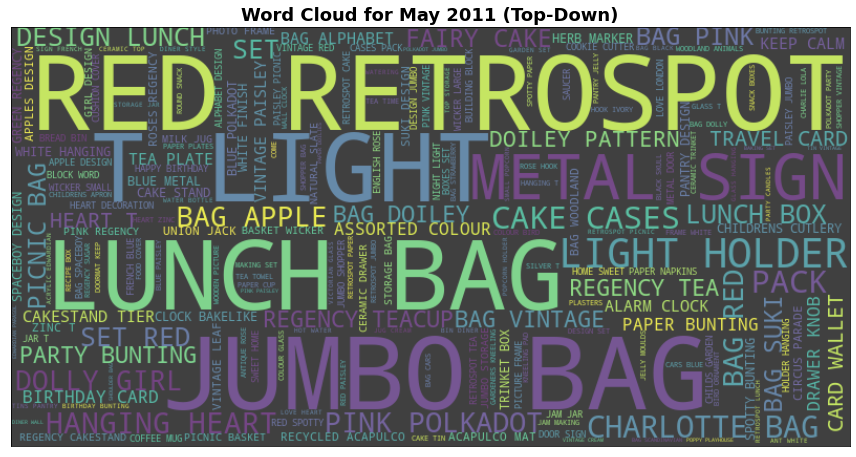

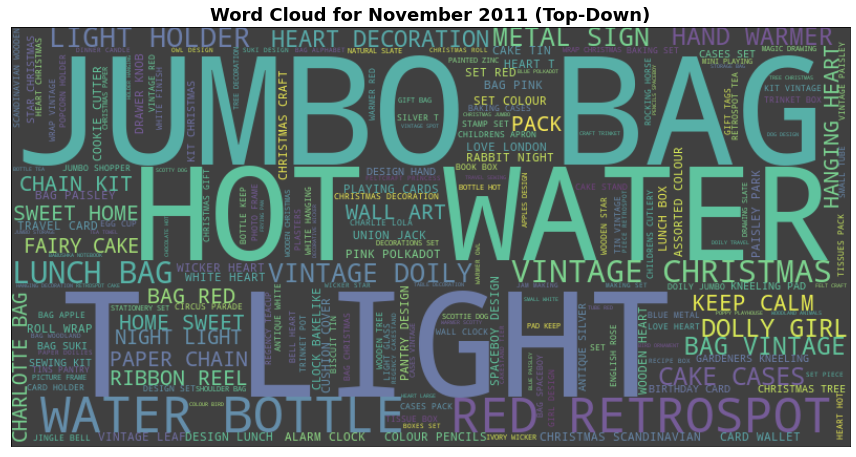

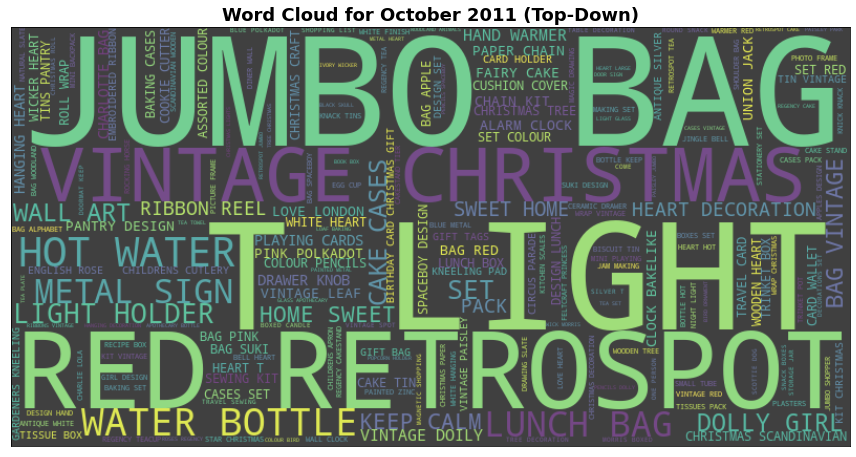

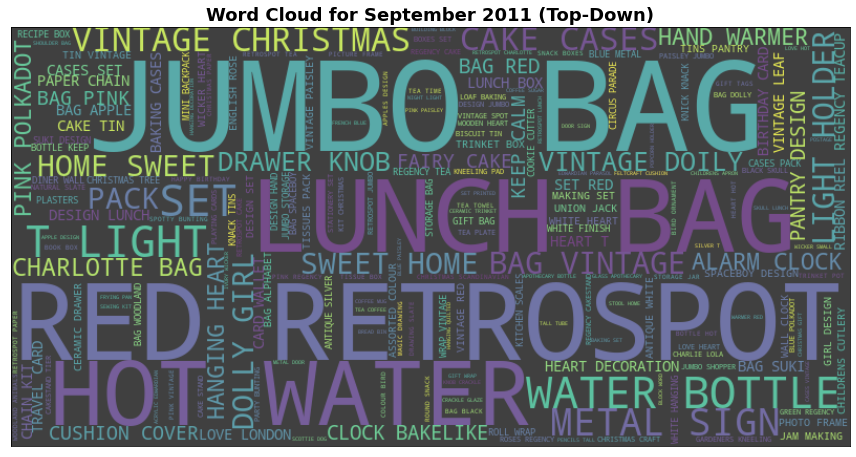

In [248]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the month from the 'InvoiceDate' column
df['Month'] = df['InvoiceDate'].dt.strftime('%B %Y')

# Concatenate all the 'Description' values for each month into a single string
text_by_month = df.groupby('Month')['Description'].apply(lambda x: ' '.join(x.dropna().astype(str).values))

# Loop through each month and display the word cloud in a separate plot
for month, text in text_by_month.items():
    # Create a WordCloud object
    wordcloud = WordCloud(background_color='black', width=800, height=400).generate(text)

    # Create a new plot for the current month
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(wordcloud, interpolation='bilinear', alpha=0.75)
    ax.set_title('Word Cloud for {} (Top-Down)'.format(month), fontsize=18, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.show()

# Data Modeling

In [258]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
X = df[['Quantity', 'UnitPrice', 'CustomerID']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Kmeans

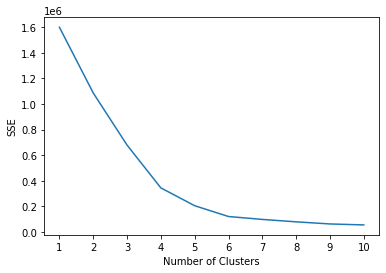

             Quantity             UnitPrice          CustomerID
                 mean   median         mean   median      count
Cluster                                                        
0           10.358648      3.0     3.762211     2.10     533392
1            1.000000      1.0  8097.205758  6497.47         33
2        77605.000000  77605.0     1.560000     1.56          4


C:\Users\user\AppData\Local\Temp\ipykernel_18400\1619554414.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [254]:
# Determine optimal number of clusters using elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add cluster labels to the data
df['Cluster'] = clusters

# Analyze the clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Quantity': ['mean', 'median'],
    'UnitPrice': ['mean', 'median'],
    'CustomerID': 'count'
})

print(cluster_analysis)

In [255]:
# cluster distribution by country 

# Создаем сводную таблицу с количеством клиентов в каждом кластере для каждой страны
pivot = pd.pivot_table(df, index='Country', columns='Cluster', values='CustomerID', aggfunc='count', fill_value=0)

# Вычисляем процент клиентов в каждом кластере для каждой страны
percentages = (pivot.div(pivot.sum(axis=1), axis=0) * 100).round(2)

# Выводим таблицу
print(percentages)

Cluster                    0     1    2
Country                                
Australia             100.00  0.00  0.0
Austria               100.00  0.00  0.0
Bahrain               100.00  0.00  0.0
Belgium               100.00  0.00  0.0
Brazil                100.00  0.00  0.0
Canada                100.00  0.00  0.0
Channel Islands       100.00  0.00  0.0
Cyprus                100.00  0.00  0.0
Czech Republic        100.00  0.00  0.0
Denmark               100.00  0.00  0.0
EIRE                  100.00  0.00  0.0
European Community    100.00  0.00  0.0
Finland               100.00  0.00  0.0
France                100.00  0.00  0.0
Germany               100.00  0.00  0.0
Greece                100.00  0.00  0.0
Hong Kong             100.00  0.00  0.0
Iceland               100.00  0.00  0.0
Israel                100.00  0.00  0.0
Italy                 100.00  0.00  0.0
Japan                 100.00  0.00  0.0
Lebanon               100.00  0.00  0.0
Lithuania             100.00  0.00  0.0


## PCA - Kmeans

In [268]:
from sklearn.decomposition import PCA
import pandas as pd
# Creating a PCA Object
pca = PCA(n_components=2)

# Applying PCA to Data
X_pca = pca.fit_transform(X_scaled)

# Output of results
print("Explained variance ratio: ", pca.explained_variance_ratio_)
print("PCA components: ", pca.components_)

Explained variance ratio:  [0.33498067 0.33363697]
PCA components:  [[ 0.70613959  0.00577924 -0.70804907]
 [-0.26366283  0.93020081 -0.25535929]]


In [ ]:
# Determine optimal number of clusters using elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# Perform clustering with optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.predict(X_scaled)

# Add cluster labels to the data
df['Cluster'] = clusters

# Analyze the clusters
cluster_analysis = df.groupby('Cluster').agg({
    'Quantity': ['mean', 'median'],
    'UnitPrice': ['mean', 'median'],
    'CustomerID': 'count'
})

print(cluster_analysis)

# Kesimpulan

In [210]:
# Kesimpulan